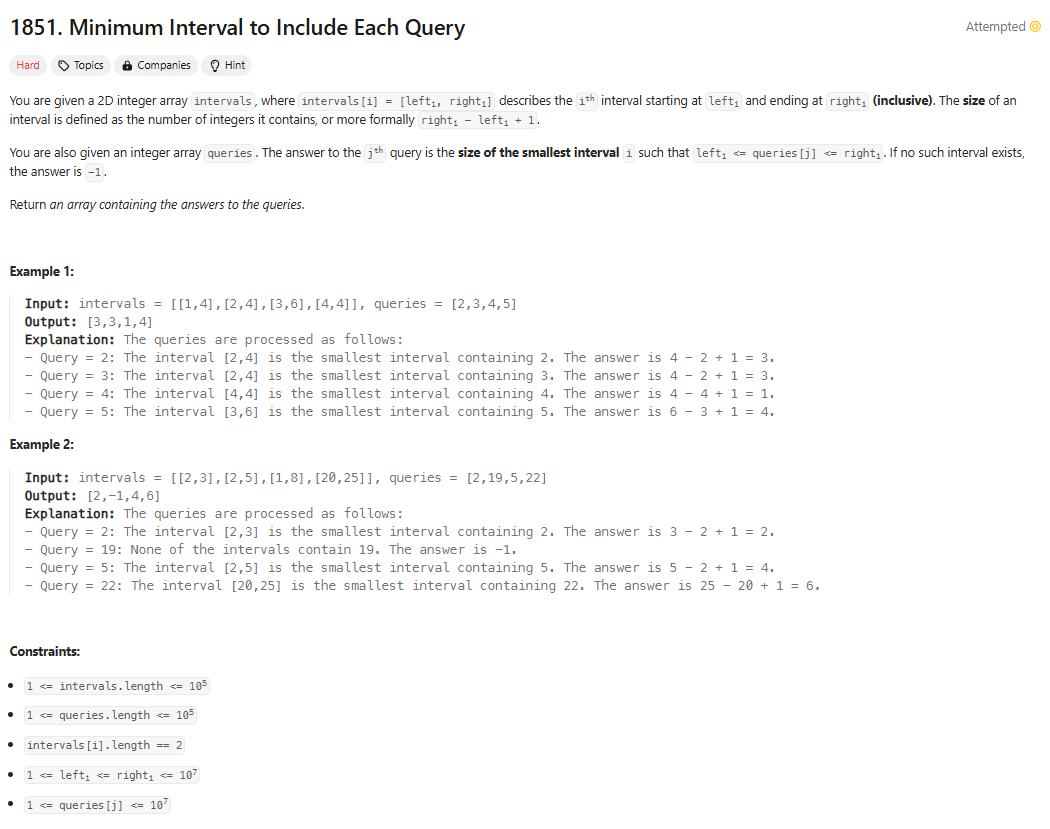

In [ ]:
# Solution 1
# O(N * max(e - s) + Q)
# Where N is number of intervals and max(e - s) refers to the longest interval,
# and Q is the number of queries.
# Time Limit Exceeds for Leetcode
class Solution:
    def minInterval(self, intervals: List[List[int]], queries: List[int]) -> List[int]:
        min_intervals = [-1] * 10000

        for start, end in intervals:
            duration = end - start + 1
            for i in range(start, end + 1):
                min_intervals[i-1] = min(min_intervals[i-1], duration) if min_intervals[i-1] != -1 else duration
        return [min_intervals[i - 1] for i in queries]

In [ ]:
# Solution 2
# O(NlogN + QlogN)
# Time Limit Exceeds for Leetcode
import heapq
import bisect

class Solution:
    def minInterval(self, intervals: List[List[int]], queries: List[int]) -> List[int]:
        intervals = sorted([(start, end, end-start+1) for start, end in intervals])

        def isOverlap(t1, t2):
            return t1[1] >= t2[0]

        def bSearch(intervals, quary):
            s, e = 0, len(intervals) - 1
            while s<=e:
                mid = (s+e)//2
                if quary < intervals[mid][0]:
                    e = mid - 1
                else:
                    s = mid + 1
            return e

        result = []
        prev_task = heapq.heappop(intervals)
        while intervals:
            next_task = heapq.heappop(intervals)
            if isOverlap(prev_task, next_task):
                # Step 1
                # *----|---------*
                #      *------------------*
                # Step 2
                # *---**---------*
                #      *---------|--------* 
                # Step 3
                # *---**---------*
                #                 *-------*  
                if next_task[0] > prev_task[0]:    
                    result.append((prev_task[0], next_task[0] - 1, prev_task[2])) 

                if next_task[1] == prev_task[1]:
                    prev_task = (next_task[0], next_task[1], min(prev_task[2], next_task[2]))
                else:
                    smaller = min(prev_task, next_task, key=lambda x: x[1])
                    larger = max(prev_task, next_task, key=lambda x: x[1])
                    prev_task = (next_task[0], smaller[1], min(smaller[2], larger[2]))
                    heapq.heappush(intervals, (smaller[1] + 1, larger[1], larger[2]))
            else:
                result.append(prev_task)
                prev_task = next_task
        result.append(prev_task)

        def MITIQ(intervals, query):
            idx = bSearch(intervals, query)
            if idx == -1:
                return -1
            return -1 if intervals[idx][1] < query else intervals[idx][2]
        
        return list(map(lambda x: MITIQ(result, x), queries))

In [ ]:
# Solution 3
# O(NlogN + QlogQ)
import heapq
class Solution:
    def minInterval(self, intervals: List[List[int]], queries: List[int]) -> List[int]:
        intervals.sort()
        result = [-1] * len(queries)
        indices = sorted(list(range(len(queries))), key=lambda i: queries[i])
        minHeap = []
        i = 0
        for q_idx in range(len(queries)):
            q = queries[indices[q_idx]]
            # Add to minHeap
            while i < len(intervals) and intervals[i][0] <= q:
                start, end = intervals[i]
                heapq.heappush(minHeap, (end - start + 1, end))
                i += 1
            
            # Pop from minHeap
            while minHeap and minHeap[0][1] < q:
                heapq.heappop(minHeap)
            
            if minHeap: result[indices[q_idx]] = minHeap[0][0]
        return result